## Ridge Regression

In [118]:
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.datasets import make_moons
from ridge_regression import RidgeRegression
from matplotlib import pyplot as plt
%matplotlib inline


In [119]:
delta = 0.1
x_coord = np.arange(-5.0, 5.0, delta)
y_coord = np.arange(-5.0, 5.0, delta)
x_coord, y_coord = np.meshgrid(x_coord, y_coord)

In [120]:
X, y = sklearn.datasets.make_moons(n_samples=100, noise=0.2, random_state=0)
#X, y = sklearn.datasets.make_circles(n_samples=100, noise=0.1, random_state=0)
#X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=5)
X = X*1.5
X0 = []
X1 = []
for i, x in enumerate(X):
    if y[i] < 1:
        X0.append(x)
    else:
        X1.append(x)

X0 = np.asarray(X0)
X1 = np.asarray(X1)

In [121]:
rr = RidgeRegression(sigma=1, llambda=0.1)
rr.fit(X, y)

In [122]:
samples = np.ndarray((x_coord.shape[0], x_coord.shape[1]))
for i in range(x_coord.shape[0]):
    for j in range(x_coord.shape[1]):
        sample = np.asarray([[x_coord[i][j], y_coord[i][j]]])
        prediction = rr.predict(sample)
        #print("Prediction: ", prediction)
        samples[i][j] = prediction

[]

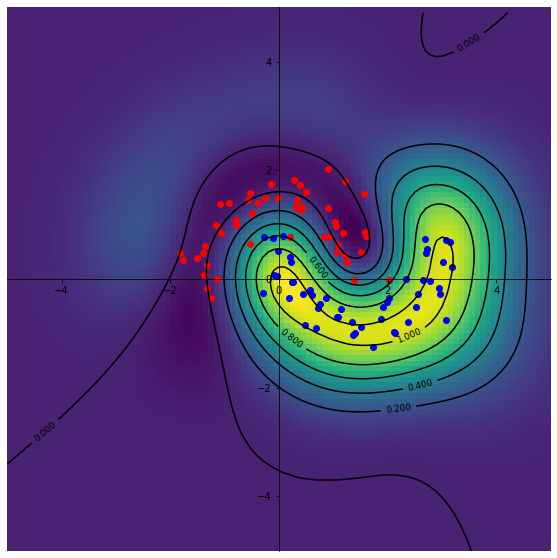

In [123]:
p, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(X0[:, 0], X0[:, 1], color='red')
ax.scatter(X1[:, 0], X1[:, 1], color='blue')
con = ax.contour(x_coord, y_coord, samples, colors="k")
ax.clabel(con, fontsize=9, inline=True)
ax.imshow(np.flip(samples, axis=0), extent=[-5, 5, -5, 5])
#ax.plot(x, y_t, c='green')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot()

[]

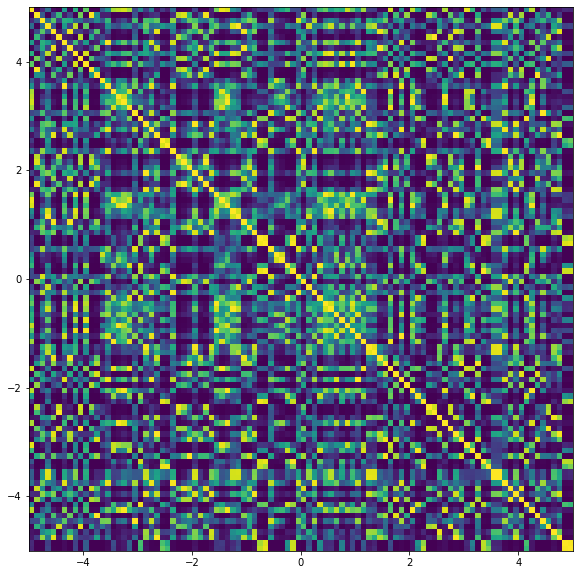

In [124]:
# show kernel matrix
p, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(rr.K, extent=[-5, 5, -5, 5])
plt.plot()